----
# Part I: Pressure

We have demonstrated how to calculate the pressure inside a planet $P(r)$ from the planet's mass density $\rho = \rho(r)$ and the pressure at the planet's surface $P(R)$.

\begin{equation}
P(r) = P(R) + \int_r^R \rho(a) g(a) da
\end{equation}

 The gravitational acceration $g(r)$ inside a planet can be determined using Newton's law of gravitation with mass inside the sphere of radius $r$:

\begin{equation}
g(r) = \frac{GM_{\text{inside}}}{r^2} = \frac{G}{r^2} \int_0^r 4\pi a^2 \rho(a) da
\end{equation}

Note that the density must satisfy the equation

\begin{equation}
M = \int_0^R 4\pi r^2 \rho(r) dr
\end{equation}

where $M$ is the planet's mass and $R$ is the planet radius. If you wonder about this equation, it is essentially $\text{mass} = \text{density} \times \text{volume}$ with density and volume as radius independent.

<h3 style="color:coral"> Say something about PREM </h3>

In [27]:
import pint
import pandas as pd
import pint_pandas

def read_mineos_cards(file,header = 3, R = None):
    """
    Read a card deck file of physical properties in mineos format
    
    Input Parameters:
    ----------------
    
    file: mineos card file containing columns with various properties
    
    header: number of lines in the header
    
    R: Mean radius of the planet
    """

    # Get the default unit registry e.g. MKS units
    ureg = pint.get_application_registry()
        
    # set default radius as Earth
    if R is None: R = 6371000.0 * ureg.meter

    names=['radius','rho','vpv','vsv','qkappa','qmu','vph','vsh','eta']
    units =['m','kg/m^3','m/s','m/s','dimensionless','dimensionless','m/s','m/s','dimensionless']
    fields=list(zip(names,units))
    #formats=[np.float for ii in range(len(fields))]
    # modelarr = np.genfromtxt(file,dtype=None,comments='#',skip_header=3,names=fields)
    modelarr = pd.read_csv(file,skiprows=header,comment='#',sep='\s+',names=fields)

    # read the units from last header
    modelarr_ = modelarr.pint.quantify(level=-1)
    
    # Get the depths based on subtracting radius from R
    modelarr_['depth'] = R - modelarr_['radius'].pint.to(R.units)
                            
    return modelarr_

In [28]:
PREM = read_mineos_cards('PREM750_CARDS')

PREM

/opt/export/course/geo203/anaconda3/lib/python3.9/site-packages/pint_pandas/pint_array.py:648: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(qtys, dtype="object", copy=copy)
/opt/export/course/geo203/anaconda3/lib/python3.9/site-packages/pint_pandas/pint_array.py:648: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.array(qtys, dtype="object", copy=copy)


,radius,rho,vpv,vsv,qkappa,qmu,vph,vsh,eta,depth
0,0.0,13088.48,11262.21,3667.8,1327.6,84.6,11262.21,3667.8,1.0,6371000.0
1,6824.0,13088.47,11262.2,3667.79,1327.6,84.6,11262.2,3667.79,1.0,6364176.0
2,13648.0,13088.44,11262.18,3667.78,1327.6,84.6,11262.18,3667.78,1.0,6357352.0
3,20472.0,13088.39,11262.14,3667.75,1327.6,84.6,11262.14,3667.75,1.0,6350528.0
4,27296.0,13088.32,11262.09,3667.72,1327.6,84.6,11262.09,3667.72,1.0,6343704.0
...,...,...,...,...,...,...,...,...,...,...
745,6369800.0,1020.0,1450.0,0.0,57822.5,0.0,1450.0,0.0,1.0,1200.0
746,6370100.0,1020.0,1450.0,0.0,57822.5,0.0,1450.0,0.0,1.0,900.0
747,6370400.0,1020.0,1450.0,0.0,57822.5,0.0,1450.0,0.0,1.0,600.0
748,6370700.0,1020.0,1450.0,0.0,57822.5,0.0,1450.0,0.0,1.0,300.0


In [29]:
PREM.rho

0      13088.48
1      13088.47
2      13088.44
3      13088.39
4      13088.32
         ...   
745      1020.0
746      1020.0
747      1020.0
748      1020.0
749      1020.0
Name: rho, Length: 750, dtype: pint[kilogram / meter ** 3]

In [30]:
PREM.rho.pint.to('g/cc')

0      13.088480000000002
1      13.088470000000003
2      13.088440000000004
3      13.088390000000002
4      13.088320000000003
              ...        
745    1.0200000000000002
746    1.0200000000000002
747    1.0200000000000002
748    1.0200000000000002
749    1.0200000000000002
Name: rho, Length: 750, dtype: pint[gram / cubic_centimeter]

In [31]:
PREM.rho.pint.to('g/cc').values.data

array([13.08848, 13.08847, 13.08844, 13.08839, 13.08832, 13.08822,
       13.08811, 13.08798, 13.08783, 13.08766, 13.08746, 13.08725,
       13.08702, 13.08676, 13.08649, 13.0862 , 13.08588, 13.08555,
       13.08519, 13.08482, 13.08442, 13.08401, 13.08357, 13.08311,
       13.08264, 13.08214, 13.08162, 13.08109, 13.08053, 13.07995,
       13.07935, 13.07873, 13.07809, 13.07744, 13.07676, 13.07606,
       13.07534, 13.0746 , 13.07384, 13.07306, 13.07225, 13.07143,
       13.07059, 13.06973, 13.06885, 13.06795, 13.06702, 13.06608,
       13.06512, 13.06413, 13.06313, 13.0621 , 13.06106, 13.06   ,
       13.05891, 13.05781, 13.05668, 13.05553, 13.05437, 13.05318,
       13.05198, 13.05075, 13.0495 , 13.04823, 13.04695, 13.04564,
       13.04431, 13.04296, 13.04159, 13.0402 , 13.03879, 13.03736,
       13.03591, 13.03444, 13.03295, 13.03144, 13.02991, 13.02836,
       13.02679, 13.0252 , 13.02358, 13.02195, 13.0203 , 13.01863,
       13.01693, 13.01522, 13.01349, 13.01173, 13.00996, 13.00

### Mini-tutorial

- **Integration with scipy**

We will compute a definite integral of $y = f(x) = x^2$ from $x=0$ to $x=3$. This integral should be compute easily the value by hand:
\begin{equation}
\int_0^3 x^2 dx = \frac{x^3}{3} \Big|_{x=0}^{x=3} = 9
\end{equation}

We will use `scipy.integrate.trapezoid` to integrate the function with given (x,y) using Trapezoidal rule.

In [19]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [14]:
x = np.linspace(0,3,100)
y = x ** 2

In [15]:
# integrate y = f(x) from x=0 to x=3
integral = integrate.trapezoid(y, x)

The different between the numerical answer and the analytical answer is about the precision of very small.

In [16]:
# compare the computed values with the analytical answer
integral - 9

0.00045913682277465284

Text(0, 0.5, 'Absolute error')

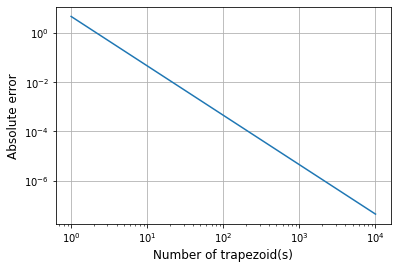

In [26]:
N = np.array([2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])
err = np.zeros(shape=np.shape(N))

for ii, n in enumerate(N):
    x = np.linspace(0,3,n)
    y = x ** 2
    err[ii] = integrate.trapezoid(y, x) - 9
    
plt.loglog(N-1,diff)
plt.grid()
plt.xlabel('Number of trapezoid(s)', fontsize=12)
plt.ylabel('Absolute error', fontsize=12)

## To do

**Q1** Compute the gravity and pressure at any given radius

**Answer**

In [50]:
import matplotlib.pyplot as plt

/tmp/ipykernel_2114434/988350095.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  gravity[ii] = G / (r[ii] ** 2) * integrate.trapezoid(4*np.pi*(r[:ii+1]**2)*rho[:ii+1], r[:ii+1])
/tmp/ipykernel_2114434/988350095.py:10: RuntimeWarning: invalid value encountered in double_scalars
  gravity[ii] = G / (r[ii] ** 2) * integrate.trapezoid(4*np.pi*(r[:ii+1]**2)*rho[:ii+1], r[:ii+1])


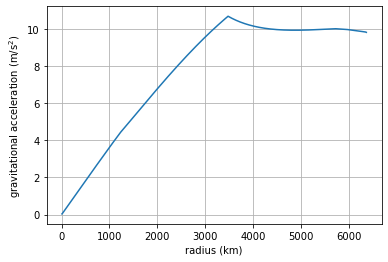

In [77]:
# integrate for gravity
# g(r) = G/r^2 \int_0^r 4\pi a^2 \rho(a) da
G = 6.674e-11      # m^3 kg^-1 s^-2      Gravitational constant

gravity = np.empty(shape = np.shape(PREM.radius.values.data))
rho = PREM.rho.values.data
r = PREM.radius.values.data

for ii in range(len(gravity)):
    gravity[ii] = G / (r[ii] ** 2) * integrate.trapezoid(4*np.pi*(r[:ii+1]**2)*rho[:ii+1], r[:ii+1])
    
plt.plot(r / 1000, gravity)
plt.xlabel('radius (km)')
plt.ylabel(r'gravitational acceleration (m/s$^2$)')
plt.grid()
plt.show()

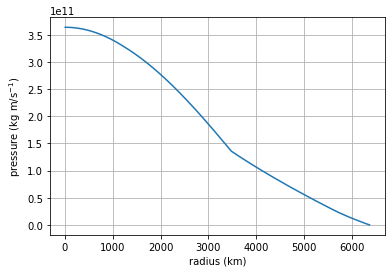

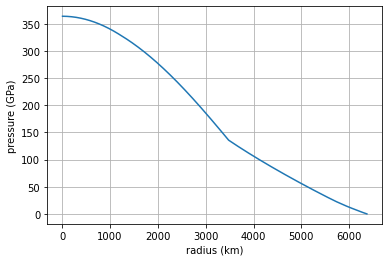

In [90]:
pressure = np.empty(shape = np.shape(PREM.radius.values.data))

for ii in range(len(pressure)):
    pressure[ii] = integrate.trapezoid(gravity[ii:] * rho[ii:], r[ii:])
    
plt.plot(r / 1000, pressure)
plt.xlabel('radius (km)')
plt.ylabel(r'pressure (kg m/s$^{-1}$)')
plt.grid()
plt.show()

plt.plot(r / 1000, pressure/1e9)
plt.xlabel('radius (km)')
plt.ylabel('pressure (GPa)')
plt.grid()
plt.show()

In [ ]:
gravity = # a numpy array
pressure =  # a numpy array

# Create a default array to add to existing Pandas Dataframe
PA_ = pint_pandas.PintArray

PREM['gravity'] = PA_(gravity, dtype="pint[m/s^2]")
PREM['pressure'] = PA_(pressure, dtype="pint[N/m^2]")

In [ ]:
PREM['pressure']

----
## Part II: Plate Motion

Below is a sketch that shows the (simplified) geometry of the lithospheric plates near the coast of Oregon and Washington. Three plates are present: the North America plate, the Pacific plate, and the Juan de Fuca plate.

![Three plates](Three_plates.png)

Assume (1) that the spreading of the Juan de Fuca plate and Pacific plate is perpendicular to the
ridge as drawn, and is 40 mm/yr, and (2) that the strike-slip motion between the North America
plate and the Pacific plate is parallel to the North America—Pacific plate boundary and is 56 mm/yr.
The orientation of the ridge is 10$^{\circ}$ East of North. The orientation of the North America—Pacific
plate boundary is 35$^{\circ}$ West of North.

## To do

**Q2** What is the motion (the direction with respect to North in degrees, and the magnitude in mm/yr) of the Juan de Fuca plate with respect to the North America plate? Draw an arrow showing this direction on the map. 

**Hint**: Because the Juan de Fuca plate is small, you can consider this a ‘flat Earth’ problem. Also, recall that if three plates interact, and the velocity vector of plate $A$ with respect to plate $B$ is $_B\textbf{V}_A$, and that of plate $B$ with respect to plate $C$ is $_C\textbf{V}_B$, then $_C\textbf{V}_A= _B\textbf{V}_A+ _C\textbf{V}_B$

**Answer**

**Q3** Based on the relative plate motion, what type of plate boundary is this? (Reminder: there are three types of plate boundaries: convergent or collision boundaries, divergent or spreading boundaries, and transform boundaries.)

**Answer**

----
## Part III: Quake Magnitude

Seismologists were for a long time content to use the intensity scale and the magnitude scale to measure and compare the sizes of earthquakes. Both of these scales are empirical, even though determining a magnitude involves making a measurement on a seismogram. Neither measure depends directly on the size of the earthquake fault or the amount of slip that occurred on it. These scales can be contrasted against the seismic moment (or scalar moment), usually denoted by $M_0$. This quantity can be routinely and accurately determined from seismograms. To do so is more complicated than measuring a magnitude, but the advantage of the seismic moment is that it is directly related to physical quantities. The seismic moment is

$$ M_0 =\mu \times A \times u, $$

where $A$ is the area of the fault that slipped, $u$ is the average amount of slip on the fault, and $\mu$ is the shear modulus, which is a property of the rocks surrounding the fault. The shear modulus describes how much force is necessary to elastically bend the rock – a typical value for rocks in the Earth’s crust is $\mu= 3.3 \times 10^{10} \text{N}/\text{m}^2$.

We can calculate the seismic moment of the greatest known earthquake, the 1960 Chile earthquake, by using estimates of the fault dimensions and slip: the length of the fault $L∼1000$ km, the width $W∼200$ km and the total slip $u∼20$ meters: $M_0 = 1000 \times 10^3 \times 200 \times 10^3 \times 20 \times 3 \times 10^{10} = 1.2 \times 10^{23} \text{Nm}$ (newton $\times$ meter). Physically this is not an *energy* but a *moment*, i.e. a force times a length of lever arm.

## To do

**Q4** The seismic moment of the 1994 Northridge (L.A.) earthquake was $2 \times 10^{19}$ Nm. The slip appears to have been 1.3 meters. How big was the fault area that slipped?

**Answer**

**Q5** If the 20 meters of slip that occurred in the 1960 Chile earthquake corresponded to the accumulated plate motions between the Nazca and South America plates since the previous great earthquake in this region — when would that earthquake have occurred? [**Useful fact**: Approximately 8 km of the Nazca plate has subducted beneath South America in the last 100,000 years.]

**Answer**

When an earthquake happens, the energy stored in the elastically deformed plates is converted into other energy forms, primarily frictional heat and elastic wave energy (most of which turns into heat, too). It turns out that it is very difficult to measure the amount of energy $E$ released in an earthquake accurately but, to within a factor of 5, it appears to be proportional to the seismic moment. A relationship which seems to be on average correct is $E= M_0 \times 5 \times 10^{-5}$. The energy $E$ is measured in newton-meters (Nm) or joules (J)

**Q6** Estimate the energy released in the 1994 Northridge (L.A.) earthquake. Compare the value you get with U.S. total daily energy consumption ($~5 \times 10^{17}$ J).

**Answer**

Instead of getting rid of the magnitude scale, seismologists decided to create a new magnitude based on the seismic moment. This was done so as not to confuse the public (and themselves), to avoid dealing with very large numbers like $10^{20}$, and to be able to compare old magnitude estimates with modern seismic moments, and so on. From the seismic moment (measured in Nm) one can calculate a magnitude $M_W$ called the moment magnitude using the equation

$$ M_W = \frac{2}{3} (\log_{10}M_0 - 9.05) $$

The constants in this equation were chosen so that the new scale coincides with Richter’s traditional magnitude scale. That is, an earthquake that is measured with traditional means to have a Richter magnitude of 6.5 will typically also have a seismic moment that corresponds to a moment magnitude of 6.5. However, for an individual earthquake, it is not uncommon for the the traditional magnitude to be wrong by half a magnitude unit. It is particularly difficult to measure the magnitudes of very large earthquakes using the ‘old-fashioned’ approach.

**Q7** What is the moment magnitude of the 1960 Chile earthquake?

**Answer**

**Q8** From these relationships, calculate how much more energy is released in a $M_W=7$ than in a $M_W=6$ earthquake.

**Answer**